In [3]:
from pyaudi import gdual
from pyaudi import sin, cos, tanh
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
import nn
n_units = [2, 5, 5, 2]
order = 1

In [17]:
def step(state, u, t):
    state[0] += sin(u[0])*u[1]*t
    state[1] += cos(u[0])*u[1]*t
    return state
    

In [18]:
x = gdual(10,'x',1)
y = gdual(10,'y',1)

In [78]:
state = [x,y]

In [116]:
weights = nn.initialize_weights(n_units, order)                
biases = nn.initialize_biases(n_units, order)     
trajs = []

In [137]:
t = 0.1
for epoch in range(100):
    traj = []
    state = [x,y]
    traj.append((state[0].constant_cf, state[1].constant_cf))
    for i in range(20):
        N = nn.N_f(state, weights, biases)
        u = [0,0]
        u[0] = N[0]
        u[1] = N[1]
        state = step(state, u, t)
        traj.append((state[0].constant_cf, state[1].constant_cf))

    loss = (state[0]**2 + state[1]**2)
    print(loss.constant_cf)
    weights, biases = nn.GD_update(loss, weights, biases, 0.0005) 
    trajs.append(traj)

0.21314826984025986
0.2125351420284896
0.2119240908638425
0.21131510747268362
0.21070818303440814
0.2101033087810061
0.20950047599663194
0.20889967601717524
0.20830090022983647
0.20770414007271035
0.20710938703436943
0.2065166326534534
0.20592586851826378
0.20533708626635863
0.2047502775841567
0.20416543420654146
0.20358254791646904
0.20300161054458524
0.20242261396883773
0.20184555011410035
0.20127041095179515
0.20069718849952276
0.2001258748206911
0.19955646202415464
0.19898894226385036
0.1984233077384409
0.19785955069096228
0.19729766340847008
0.19673763822169527
0.1961794675046995
0.1956231436745341
0.19506865919090352
0.19451600655583107
0.1939651783133285
0.19341616704906892
0.19286896539006243
0.1923235660043331
0.19177996160060415
0.19123814492798044
0.19069810877563767
0.19015984597251223
0.18962334938699718
0.1890886119266355
0.1885556265378251
0.1880243862055154
0.18749488395291813
0.1869671128412105
0.18644106596925195
0.18591673647329246
0.185394117526692
0.184873202339639

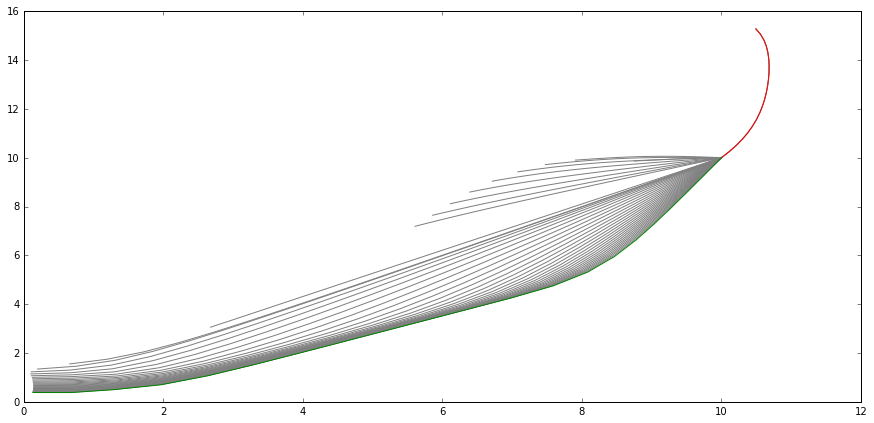

In [138]:
plt.rcParams['figure.figsize'] = (15,7)

    
for i, epoch in enumerate(range(10)):
    traj = np.asarray(trajs[int(epoch)])
    plt.plot(traj[:,0], traj[:,1], color='gray')

for i, epoch in enumerate(np.arange(0, len(trajs), len(trajs)/30)):
    traj = np.asarray(trajs[int(epoch)])
    plt.plot(traj[:,0], traj[:,1], color='gray')
    
    
traj = np.asarray(trajs[0])
plt.plot(traj[:,0], traj[:,1], color='red')
    
traj = np.asarray(trajs[-1])
plt.plot(traj[:,0], traj[:,1], color='green')
    